**DATA** **ANALYST** - **PREETHAM**

In [ ]:
!pip install pandas seaborn matplotlib scikit-learn imbalanced-learn

In [ ]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape
df.info()
df.describe()
df['Class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,count
Class,
0,284315
1,492


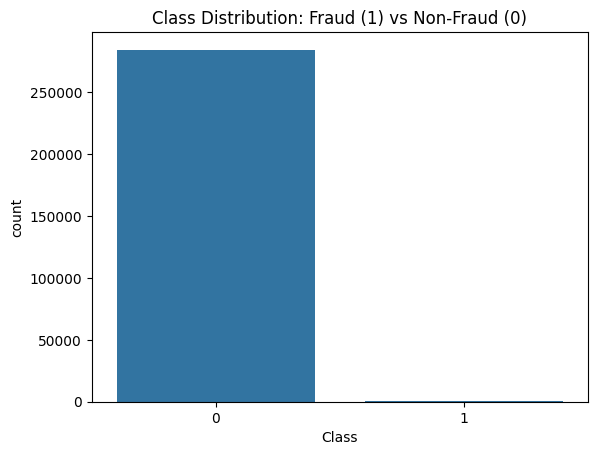

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title('Class Distribution: Fraud (1) vs Non-Fraud (0)')
plt.show()

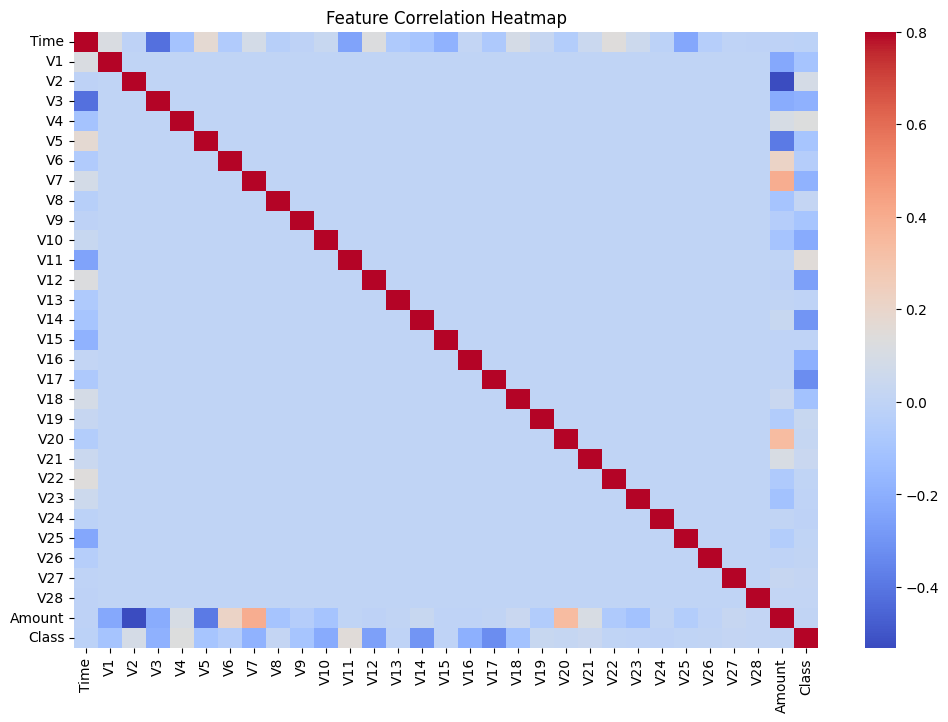

In [ ]:
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap='coolwarm', vmax=0.8)
plt.title("Feature Correlation Heatmap")
plt.show()

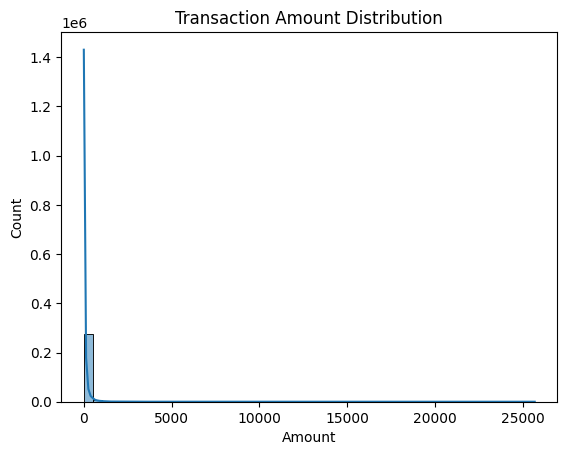

In [ ]:
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
df.to_csv("cleaned_creditcard.csv", index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

# Split (keep test set original to evaluate properly)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 227451, 1: 394})
After SMOTE: Counter({0: 227451, 1: 227451})


In [ ]:
import pandas as pd

pd.DataFrame(X_train_resampled).to_csv("X_train_resampled.csv", index=False)
pd.DataFrame(y_train_resampled, columns=['Class']).to_csv("y_train_resampled.csv", index=False)

In [ ]:
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

MACHINE LEARNING ENGINEER - B VITTAL RAO

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import joblib


In [ ]:
X_train = pd.read_csv('X_train_resampled.csv')
y_train = pd.read_csv('y_train_resampled.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train.values.ravel())


LogisticRegression(max_iter=1000)

In [ ]:
rf_preds = rf_model.predict(X_test)
lr_preds = lr_model.predict(X_test)


In [ ]:
pd.DataFrame(rf_preds).to_csv("rf_predictions.csv", index=False)

In [ ]:
pd.DataFrame(lr_preds).to_csv("lr_predictions.csv", index=False)

In [ ]:
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(lr_model, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

EVAUATION LEAD - LEKHANA GOWDA

In [ ]:
import pandas as pd
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score
)


In [ ]:
y_test = pd.read_csv("y_test.csv")
rf_pred = pd.read_csv("rf_predictions.csv")  # or use model.predict()
lr_pred = pd.read_csv("lr_predictions.csv")  # optional


In [ ]:
print(" Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


 Random Forest Evaluation:
Accuracy: 0.9994908886626171
Precision: 0.8709677419354839
Recall: 0.826530612244898
F1 Score: 0.8481675392670157
ROC AUC: 0.9131597912096746
[[56852    12]
 [   17    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
print(" Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1 Score:", f1_score(y_test, lr_pred))
print("ROC AUC:", roc_auc_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


 Logistic Regression Evaluation:
Accuracy: 0.9733682103858713
Precision: 0.05628517823639775
Recall: 0.9183673469387755
F1 Score: 0.1060695344725987
ROC AUC: 0.9459151731880147
[[55355  1509]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



**VISUALIZER - SNEHA**

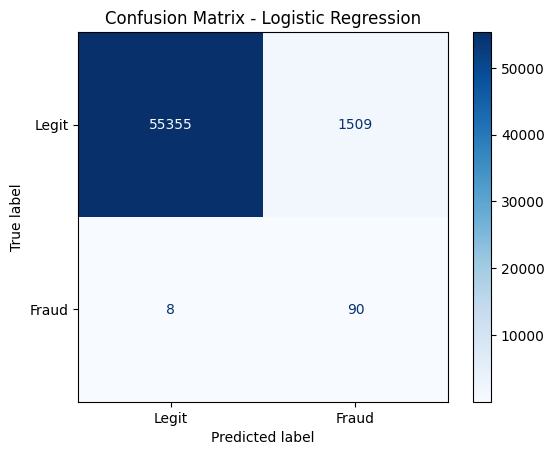

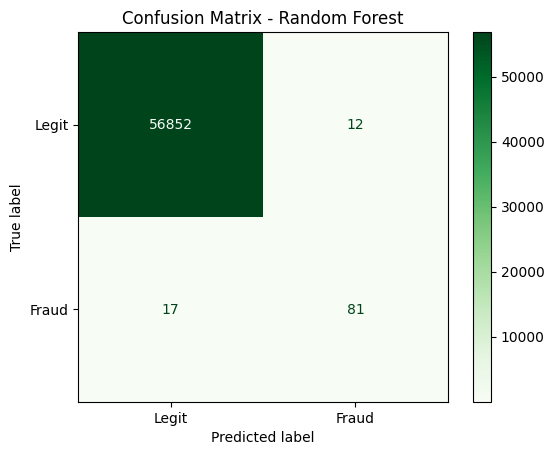

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Logistic Regression
# Convert the list to a NumPy array
cm_lr = np.array([[55355, 1509], [8, 90]])
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Legit", "Fraud"])
disp_lr.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("confusion_matrix_lr.png")

# Random Forest
# Convert the list to a NumPy array
cm_rf = np.array([[56852, 12], [17, 81]])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Legit", "Fraud"])
disp_rf.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.savefig("confusion_matrix_rf.png")